<img src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Vertical-SinFondo.png"
     align="right"
     width="150"/>

# **Segundo Examen Parcial**

## **Modelo de predicción lineal**

- Esteban Gomez Valerio
---

In [188]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.kernel_ridge import KernelRidge


In [189]:
df = pd.read_csv('Datos/datos_gente.csv')
df.head()

,Altura,Ancho,Pie
0,185,55,28.0
1,173,44,26.5
2,163,44,24.0
3,162,44,24.5
4,172,46,27.0


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Altura  18 non-null     int64  
 1   Ancho   18 non-null     int64  
 2   Pie     18 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 560.0 bytes


In [191]:
fig1 = px.scatter(df, x="Altura", y="Ancho", 
                  title="Altura vs Ancho", 
                  labels={"Altura": "Altura (cm)", "Ancho": "Ancho (cm)"},
                  color_discrete_sequence=["blue"])

fig2 = px.scatter(df, x="Altura", y="Pie", 
                  title="Altura vs Pie", 
                  labels={"Altura": "Altura (cm)", "Pie": "Pie (cm)"},
                  color_discrete_sequence=["red"])

fig1.show()
fig2.show()

In [192]:
fig = go.Figure(data=[go.Scatter3d(
    x=df['Ancho'], 
    y=df['Pie'], 
    z=df['Altura'],
    mode='markers',
    marker=dict(size=8, color=df['Altura'], colorscale='Viridis', opacity=0.8)
)])

fig.update_layout(
    title="Gráfica 3D: Altura vs Ancho vs Pie",
    scene=dict(
        xaxis_title="Ancho (cm)",
        yaxis_title="Pie (cm)",
        zaxis_title="Altura (cm)"
    )
)

fig.show()

## **Modelos Lineales**

### **Sampleo de Datos**

In [193]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

In [194]:
param_grid = {
    'n_components': range(1, 11),  
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],  
    'reg_covar': [1e-6, 1e-4, 1e-2, 1e-1]  
}

In [195]:
gmm = GaussianMixture(random_state=42)
grid_search = GridSearchCV(gmm, param_grid, scoring=None, cv=3, verbose=1)
grid_search.fit(df)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


GridSearchCV(cv=3, estimator=GaussianMixture(random_state=42),
             param_grid={'covariance_type': ['full', 'tied', 'diag',
                                             'spherical'],
                         'n_components': range(1, 11),
                         'reg_covar': [1e-06, 0.0001, 0.01, 0.1]},
             verbose=1)

In [196]:
print("Mejores hiperparámetros encontrados:")
grid_search.best_params_

Mejores hiperparámetros encontrados:


{'covariance_type': 'diag', 'n_components': 2, 'reg_covar': 0.1}

In [197]:
best_gmm = grid_search.best_estimator_

In [198]:
synthetic_n = 50

In [199]:
synthetic_samples, _ = best_gmm.sample(synthetic_n)
synthetic_data = pd.DataFrame(synthetic_samples, columns=df.columns)

In [200]:
print("Datos sintéticos generados:")
synthetic_data.head()

Datos sintéticos generados:


,Altura,Ancho,Pie
0,169.377755,52.675202,27.698789
1,182.732899,47.947897,26.945256
2,172.778843,46.144754,24.989414
3,182.354433,55.289214,26.009484
4,173.680771,47.099251,26.778310


In [201]:
df.shape

(18, 3)

In [202]:
df = pd.concat([synthetic_data, df])
df.shape

(68, 3)

In [203]:
fig1 = px.scatter(df, x="Altura", y="Ancho", 
                  title="Altura vs Ancho", 
                  labels={"Altura": "Altura (cm)", "Ancho": "Ancho (cm)"},
                  color_discrete_sequence=["blue"])

fig2 = px.scatter(df, x="Altura", y="Pie", 
                  title="Altura vs Pie", 
                  labels={"Altura": "Altura (cm)", "Pie": "Pie (cm)"},
                  color_discrete_sequence=["red"])

fig1.show()
fig2.show()

### **Train Test Split**

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [205]:
X = df[['Pie', 'Ancho']]
y = df['Altura']

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [207]:
print(f'Shape de X_train {X_train.shape}')
print(f'Shape de X_test {X_test.shape}')
print(f'Shape de y_train {y_train.shape}')
print(f'Shape de y_test {y_test.shape}')

Shape de X_train (54, 2)
Shape de X_test (14, 2)
Shape de y_train (54,)
Shape de y_test (14,)


### **Modelo 1: Linnear Regression**

In [208]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [209]:
y_pred = model.predict(X_test)

In [210]:
print(f'Shape de y_pred {y_pred.shape}')

Shape de y_pred (14,)


In [211]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'El r2: {r2:.3f}')
print(f'El rmse: {rmse:.3f}')

El r2: 0.378
El rmse: 6.086


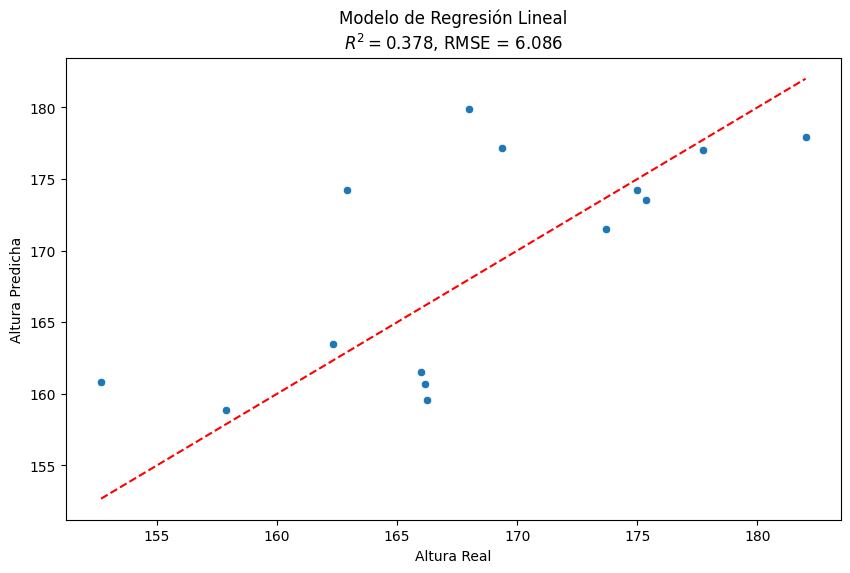

In [212]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Línea de identidad
plt.title(f"Modelo de Regresión Lineal\n$R^2 = {r2:.3f}$, RMSE = {rmse:.3f}")
plt.xlabel("Altura Real")
plt.ylabel("Altura Predicha")
plt.show()

### **Modelo 2: Lineal Dividido**

In [213]:
altura_median = df['Altura'].median()

df_bajo = df[df['Altura'] <= altura_median]
df_alto = df[df['Altura'] > altura_median]

In [214]:
fig1 = px.scatter(df_bajo, x="Altura", y="Ancho", 
                  title="Altura vs Ancho Grupo Bajo", 
                  labels={"Altura": "Altura (cm)", "Ancho": "Ancho (cm)"},
                  color_discrete_sequence=["blue"])

fig2 = px.scatter(df_bajo, x="Altura", y="Pie", 
                  title="Altura vs Pie Grupo Bajo" , 
                  labels={"Altura": "Altura (cm)", "Pie": "Pie (cm)"},
                  color_discrete_sequence=["red"])

fig1.show()
fig2.show()

In [215]:
fig1 = px.scatter(df_alto, x="Altura", y="Ancho", 
                  title="Altura vs Ancho Grupo Alto", 
                  labels={"Altura": "Altura (cm)", "Ancho": "Ancho (cm)"},
                  color_discrete_sequence=["blue"])

fig2 = px.scatter(df_alto, x="Altura", y="Pie", 
                  title="Altura vs Pie Grupo Alto" , 
                  labels={"Altura": "Altura (cm)", "Pie": "Pie (cm)"},
                  color_discrete_sequence=["red"])

fig1.show()
fig2.show()

In [216]:
X_bajo = df_bajo[['Pie', 'Ancho']]
y_bajo = df_bajo['Altura']

X_alto = df_alto[['Pie', 'Ancho']]
y_alto = df_alto['Altura']

X_train_bajo, X_test_bajo, y_train_bajo, y_test_bajo = train_test_split(X_bajo, y_bajo, test_size=0.2, random_state=42)
X_train_alto, X_test_alto, y_train_alto, y_test_alto = train_test_split(X_alto, y_alto, test_size=0.2, random_state=42)

model_bajo = LinearRegression()
model_bajo.fit(X_train_bajo, y_train_bajo)

model_alto = LinearRegression()
model_alto.fit(X_train_alto, y_train_alto)

LinearRegression()

In [217]:
y_pred_bajo = model_bajo.predict(X_test_bajo)
y_pred_alto = model_alto.predict(X_test_alto)

In [218]:
fig_bajo = go.Figure()

fig_bajo.add_trace(go.Scatter(
    x=y_test_bajo, 
    y=y_pred_bajo,
    mode='markers',
    name='Datos (Bajo)',
    marker=dict(color='blue')
))

fig_bajo.add_trace(go.Scatter(
    x=y_test_bajo,
    y=y_test_bajo,
    mode='lines',
    name='Línea Ideal',
    line=dict(color='red', dash='dash')
))

fig_bajo.update_layout(
    title='Predicción Altura (Grupo Bajo)',
    xaxis_title='Altura Real',
    yaxis_title='Altura Predicha',
    width=700,
    height=500
)

fig_bajo.show()

In [219]:
fig_alto = go.Figure()

fig_alto.add_trace(go.Scatter(
    x=y_test_alto, 
    y=y_pred_alto,
    mode='markers',
    name='Datos (Alto)',
    marker=dict(color='green')
))

fig_alto.add_trace(go.Scatter(
    x=y_test_alto,
    y=y_test_alto,
    mode='lines',
    name='Línea Ideal',
    line=dict(color='red', dash='dash')
))

fig_alto.update_layout(
    title='Predicción Altura (Grupo Alto)',
    xaxis_title='Altura Real',
    yaxis_title='Altura Predicha',
    width=700,
    height=500
)

fig_alto.show()


In [220]:
def modelo_ensamble(x_row, umbral):
    if model_bajo.predict([x_row])[0] <= umbral:
        return model_bajo.predict([x_row])[0]
    else:
        return model_alto.predict([x_row])[0]

y_pred_ensamble = [modelo_ensamble(x, altura_median) for x in X_test.values]

r2_ensamble = r2_score(y_test, y_pred_ensamble)
rmse_ensamble = np.sqrt(mean_squared_error(y_test, y_pred_ensamble))

print(f'Ensamble R2: {r2_ensamble:.3f}, RMSE: {rmse_ensamble:.3f}')


Ensamble R2: 0.073, RMSE: 7.429


c:\Users\esteb\miniconda3\envs\deep_learning\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\esteb\miniconda3\envs\deep_learning\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\esteb\miniconda3\envs\deep_learning\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\esteb\miniconda3\envs\deep_learning\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\esteb\miniconda3\envs\deep_learning\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [221]:
fig_ensamble = go.Figure()

fig_ensamble.add_trace(go.Scatter(
    x=y_test, 
    y=y_pred_ensamble,
    mode='markers',
    name='Datos (Ensamble)',
    marker=dict(color='purple')
))

fig_ensamble.add_trace(go.Scatter(
    x=y_test,
    y=y_test,
    mode='lines',
    name='Línea Ideal',
    line=dict(color='red', dash='dash')
))

fig_ensamble.update_layout(
    title='Predicción Altura (Modelo Ensamble)',
    xaxis_title='Altura Real',
    yaxis_title='Altura Predicha',
    width=700,
    height=500
)

fig_ensamble.show()


### **Modelo 3: AnchoPie**

In [222]:
df_AnchoPie = df.copy()
df_AnchoPie['AnchoPie'] = df_AnchoPie['Pie'] * df_AnchoPie['Ancho']
df_AnchoPie.head()

,Altura,Ancho,Pie,AnchoPie
0,169.377755,52.675202,27.698789,1459.039310
1,182.732899,47.947897,26.945256,1291.968365
2,172.778843,46.144754,24.989414,1153.130366
3,182.354433,55.289214,26.009484,1438.043923
4,173.680771,47.099251,26.778310,1261.238326


In [223]:
fig1 = px.scatter(df_AnchoPie, x="Altura", y="AnchoPie", 
                  title="Altura vs AnchoPie", 
                  labels={"Altura": "Altura (cm)", "AnchoPie": "AnchoPie"},
                  color_discrete_sequence=["blue"])

fig1.show()

In [224]:
X_anchopie = df_AnchoPie[['AnchoPie', 'Ancho', 'Pie']]
y_anchopie = df_AnchoPie['Altura']

X_train_anchopie, X_test_anchopie, y_train_anchopie, y_test_anchopie = train_test_split(X_anchopie, y_anchopie, test_size=0.2, random_state=42)

In [225]:
modelo_anchopie = LinearRegression()
modelo_anchopie.fit(X_train_anchopie, y_train_anchopie)

LinearRegression()

In [226]:
y_pred_anchopie = modelo_anchopie.predict(X_test_anchopie)

In [227]:
r2_ensamble = r2_score(y_test, y_pred_ensamble)
rmse_ensamble = np.sqrt(mean_squared_error(y_test, y_pred_ensamble))
print(f'Ensamble R2: {r2_ensamble:.3f}, RMSE: {rmse_ensamble:.3f}')

Ensamble R2: 0.073, RMSE: 7.429
